<a href="https://colab.research.google.com/github/Aditya100300/LLMs_from_scratch/blob/main/Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Sentence Transformers, Image–Text Models, and Hugging Face APIs

In this notebook, we will explore multiple topics:
  
- **Sentence Transformers:**  
  - How to install and load a powerful sentence encoder.
  - Encoding sentences into dense vectors.
  - Calculating cosine similarity between sentence embeddings.

- **Question Answering with DPR:**  
  - Using DPR-based encoders and tokenizers for context and questions.
  - Matching questions to the most relevant context via cosine similarity.

- **Image–Text Embedding with CLIP:**  
  - Loading and processing images from the web.
  - Using the CLIP model and processor to obtain matching captions.

- **Cosine Similarity using NumPy:**  
  - A simple implementation to understand how cosine similarity is computed.

- **Hugging Face APIs for Text Generation and Summarization:**  
  - How to call the Hugging Face Inference API (using models such as Bloom, BART, and Dolly V2).
  - Using the Transformers pipelines for question answering.

We'll break down each section step by step.


In [1]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## Part 1: Sentence Transformers – Encoding and Similarity

In this section, we will:
  
- **Load a Sentence Transformer model:**  
  - We use the model "BAAI/bge-base-en-v1.5" (feel free to switch to another model, e.g., "all-mpnet-base-v2").
  
- **Define example sentences:**  
  - A list of sentences that we will encode.
  - A long text (here a multi-line string) for demonstration.
  
- **Encode sentences into dense vectors:**  
  - Use the model's `.encode()` method to convert text into a fixed-size vector.
  
- **Examine the embeddings and compute cosine similarity:**  
  - We use the provided `cos_sim` utility from sentence_transformers.


In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("BAAI/bge-base-en-v1.5")
#model = SentenceTransformer('all-mpnet-base-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Defining Example Texts

- **sentences:** A list of seven example sentences.
- **long_text:** A multi-line string (in a list) used to show that you can encode longer documents.


In [3]:
sentences = [
    "it caught him off guard that space smelled of seared steak",
    "she could not decide between painting her teeth or brushing her nails",
    "he thought there'd be sufficient time is he hid his watch",
    "the bees decided to have a mutiny against their queen",
    "the sign said there was road work ahead so she decided to speed up",
    "on a scale of one to ten, what's your favorite flavor of color?",
    "flying stinging insects rebelled in opposition to the matriarch"
]

In [4]:
long_text = ["""
Comparing the cosine similarity scores, we see that by introducing the word "elephant" instead of "mouse" in Sentence 2, the cosine similarity score increased from approximately 0.856 (without noise) to approximately 0.898 (with noise).
This demonstrates how noise can affect the similarity measurement between sentences.
"""]


In [5]:
len(long_text)

1

In [6]:
len(sentences)

7

### Encoding the Sentences

- **model.encode(sentences):**  
  - Converts each sentence into a dense vector.
  - The resulting embedding shape will be (number of sentences, vector size).
- **Embedding size:**  
  - For many sentence-transformer models, the default vector size is 768.


In [7]:
embeddings = model.encode(sentences)
embeddings.shape

(7, 768)

### Examining an Embedding

Let's print the first embedding vector to see what it looks like.
  
- **Note:**  
  - The vector is a 768-dimensional NumPy array.
  - Each value represents the contribution of features learned by the model.


In [8]:
#the bees decided to have a mutiny against their queen
#"flying stinging insects rebelled in opposition to the matriarch"

In [9]:
embeddings[0]

array([-3.11309975e-02, -6.33348245e-03, -3.15453261e-02, -9.38075595e-03,
        2.93191429e-02, -4.42197137e-02,  4.61156480e-03,  7.03319721e-03,
        2.35604998e-02, -2.24433467e-02, -7.09381187e-03,  7.69083295e-03,
       -2.86267065e-02, -1.05867488e-02,  4.92583960e-02,  5.61846495e-02,
        5.43212816e-02,  6.44918473e-04,  1.45956324e-02, -7.99637288e-03,
        3.19179296e-02,  1.43817738e-02,  1.94561817e-02,  4.02895212e-02,
        1.64064346e-03,  2.12156330e-03, -1.24322446e-02, -4.86925477e-03,
       -6.44296557e-02,  2.58044042e-02,  2.62061786e-02, -1.19880529e-03,
        8.56431108e-03, -8.14263821e-02,  3.10381991e-03,  2.83655571e-03,
       -1.34972483e-02, -3.67679447e-02, -3.28232273e-02,  5.16221523e-02,
       -5.78199029e-02,  6.28134385e-02,  5.80596225e-03,  4.21530865e-02,
       -2.54804902e-02,  2.08834726e-02, -4.08995599e-02, -1.11355660e-02,
       -2.49521043e-02, -2.69315969e-02, -1.93051305e-02, -2.66540032e-02,
        5.13588823e-02, -

In [10]:
# "it caught him off guard that space smelled of seared steak",

#


### Calculating Cosine Similarity

We now calculate the cosine similarity between the first sentence’s embedding and the embeddings of the remaining sentences.

- **cos_sim:**  
  - This utility function computes the cosine similarity between two vectors.
  
- **Process:**  
  - Compare embedding of sentence 1 with embeddings of sentence 2 through 7.
  - Sort or iterate through the similarity scores and print them.


In [11]:
from sentence_transformers.util import cos_sim

scores = cos_sim(embeddings[0], embeddings[1:])

print(sentences[0])
for i, score in enumerate(scores[0]):
    print(f"{round(score.item(), 4)} | {sentences[i+1]}")

it caught him off guard that space smelled of seared steak
0.4394 | she could not decide between painting her teeth or brushing her nails
0.5773 | he thought there'd be sufficient time is he hid his watch
0.38 | the bees decided to have a mutiny against their queen
0.4003 | the sign said there was road work ahead so she decided to speed up
0.3709 | on a scale of one to ten, what's your favorite flavor of color?
0.3999 | flying stinging insects rebelled in opposition to the matriarch


- simple exercise:
-Sentence 1: The boy ran upstairs
-Sentence 2: The girl ran upstairs
-Sentence 3: The cat ran upstairs
-Sentence 4: The cat ran outside

Sentence 1 and 2 : 0.74999
Sentence 1 and 3: 0.7009
Sentence 1 and 4:

In [12]:
#Sentence 1 and 2 : 0.74999
#Sentence 1 and 3: 0.7009
#Sentence 3 and 4: 0.3317
#Sentence 1 and 4: 0.3897

In [13]:

# scores = cos_sim(embeddings[0], embeddings[:-1])

# print(sentences[-1])
# for i, score in enumerate(scores[0]):
#     print(f"{round(score.item(), 4)} | {sentences[i]}")

#Question Answer

## Part 2: Question Answering Using DPR Encoders

In this section, we use DPR (Dense Passage Retrieval) models for question answering.

- **DPRContextEncoder and DPRQuestionEncoder:**  
  - Two separate models for encoding context and questions.
  
- **Steps:**  
  - Load the appropriate models and tokenizers.
  - Tokenize a list of contexts and a list of questions.
  - Compute embeddings for both.
  - For each question, compute cosine similarity with the contexts and print the best matching context.


In [14]:
from transformers import DPRContextEncoder, DPRContextEncoderTokenizer, DPRQuestionEncoder, DPRQuestionEncoderTokenizer
ctx_model = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

question_model = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

config.json:   0%|          | 0.00/492 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizer'.


config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.bias', 'question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### Preparing Questions and Contexts

- **questions:** A list of questions.
- **contexts:** A list of sentences (contexts) that might contain the answers.
  
- **Tokenization:**  
  - We tokenize the contexts and questions separately.
  - Use max_length, padding, and truncation for uniform tensor sizes.


In [15]:
questions = [
    "what is the capital city of australia?",
    "what is the best selling sci-fi book?",
    "how many searches are performed on Google?",
    "how many students are there in ML system design class?",
    "Why is the sky blue?"
]

contexts = [
    "canberra is the capital city of australia",
    "the capital city of france is paris",
    "sc-fi is a popular book genre read by millions",
    "the best-selling sci-fi book is dune",
    "Google serves more than 2 trillion queries annually",
    "Google is a popular search engine",
    "The number of students in ML System design class is 22"
]

In [16]:
xb_tokens = ctx_tokenizer(contexts, max_length=256, padding='max_length',
                          truncation=True, return_tensors='pt')
xb = ctx_model(**xb_tokens)

xq_tokens = question_tokenizer(questions, max_length=256, padding='max_length',
                               truncation=True, return_tensors='pt')
xq = question_model(**xq_tokens)

In [17]:
xb.pooler_output.shape, xq.pooler_output.shape

(torch.Size([7, 768]), torch.Size([5, 768]))

### Matching Questions to Contexts

For each question:
  
- We compute the cosine similarity between its embedding and all context embeddings.
- Print the question along with the context that yields the highest similarity score.


In [18]:
import torch

for i, xq_vec in enumerate(xq.pooler_output):
    probs = cos_sim(xq_vec, xb.pooler_output)
    argmax = torch.argmax(probs)
    print(questions[i])
    print(contexts[argmax])
    print('---')

what is the capital city of australia?
canberra is the capital city of australia
---
what is the best selling sci-fi book?
the best-selling sci-fi book is dune
---
how many searches are performed on Google?
Google serves more than 2 trillion queries annually
---
how many students are there in ML system design class?
The number of students in ML System design class is 22
---
Why is the sky blue?
the best-selling sci-fi book is dune
---


#Image-Text Embedding

## Part 3: Image–Text Embedding Using CLIP

Here we explore how to match images with text captions using the CLIP model.

- **Steps:**  
  - Load images from web URLs.
  - Display the images using matplotlib.
  - Load the CLIP model and processor.
  - Process both images and text captions.
  - Retrieve the most relevant caption for each image using the logits.


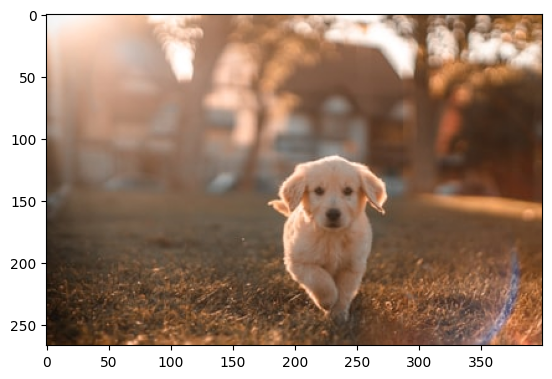

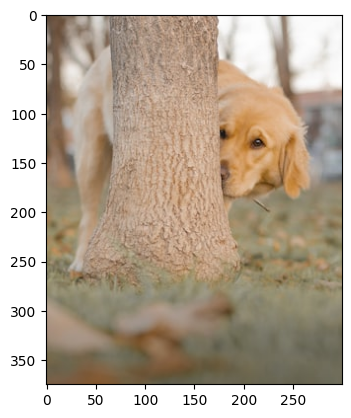

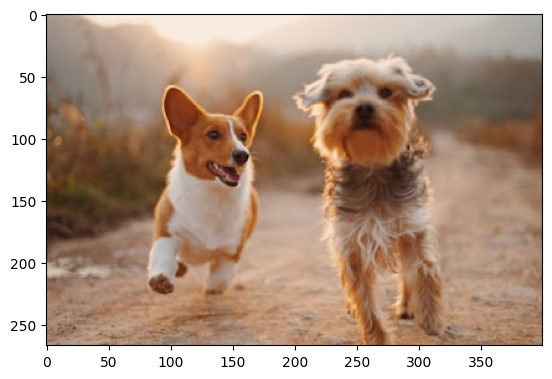

In [19]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests

urls = [
    "https://images.unsplash.com/photo-1576201836106-db1758fd1c97?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80",
    "https://images.unsplash.com/photo-1591294100785-81d39c061468?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=300&q=80",
    "https://images.unsplash.com/photo-1548199973-03cce0bbc87b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80"
]

images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]

# let's see what we have
for image in images:
    plt.show(plt.imshow(np.asarray(image)))

### Loading and Running CLIP

- **CLIPProcessor and CLIPModel:**  
  - These classes allow joint processing of text and images.
  
- **Process:**  
  - Define a list of captions.
  - Call the processor with both text and images.
  - Run the model to get logits, then choose the best matching caption for each image.


In [20]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [21]:
captions = ["a dog hiding behind a tree",
            "two dogs running",
            "a dog running",
            "a cucumber on a tree",
            "trees in the park",
            "a cucumber dog"]
inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

probs = outputs.logits_per_image.argmax(dim=1)
probs

tensor([2, 0, 1])

a dog running


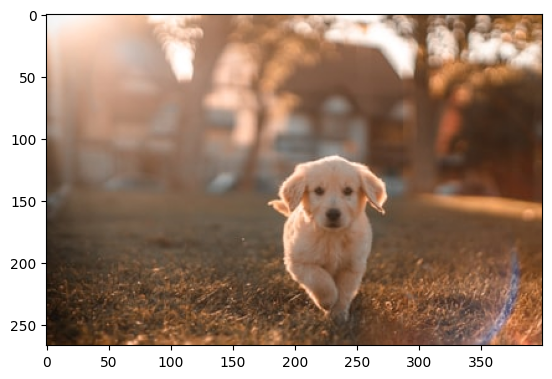

a dog hiding behind a tree


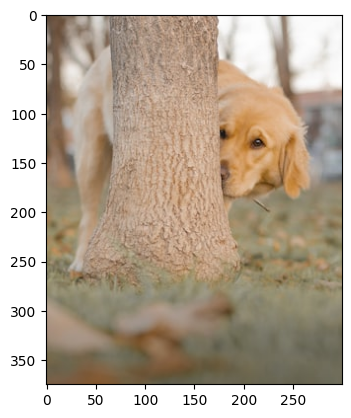

two dogs running


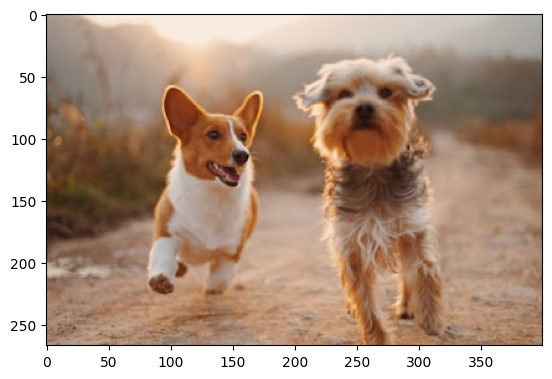

In [22]:
for i, image in enumerate(images):
    argmax = probs[i].item()
    print(captions[argmax])
    plt.show(plt.imshow(np.asarray(image)))

In [23]:
# requirements:
! pip install huggingface_hub accelerate
! git config --global credential.helper store

## Part 4: Cosine Similarity with NumPy

Here, we implement a simple cosine similarity function using NumPy.

- **Steps:**  
  - Split sentences into words.
  - Create frequency vectors for the words in each sentence.
  - Compute the dot product and magnitudes.
  - Calculate cosine similarity.


In [24]:
import numpy as np

def calculate_cosine_similarity(sentence1, sentence2):
    # Create a set of unique words from both sentences
    word_set = set(sentence1.split() + sentence2.split())

    # Create vectors representing the frequency of each word in each sentence
    vector1 = np.array([sentence1.split().count(word) for word in word_set])
    vector2 = np.array([sentence2.split().count(word) for word in word_set])

    # Calculate the dot product of the two vectors
    dot_product = np.dot(vector1, vector2)

    # Calculate the magnitude of each vector
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    # Calculate the cosine similarity
    cosine_similarity = dot_product / (magnitude1 * magnitude2)

    return cosine_similarity

# Test the function
sentence1 = "The cat chased the mouse."
sentence2 = "The cat chased the mouse in the garden."
sentence3 = "The mouse chased the elephant in the garden."

similarity_score = calculate_cosine_similarity(sentence1, sentence2)
print(f"The cosine similarity between the two sentences is: {similarity_score}")


The cosine similarity between the two sentences is: 0.7071067811865475


In [25]:
# vector1 = np.array([sentence1.split().count(word) for word in word_set])

In [26]:

similarity_score = calculate_cosine_similarity(sentence2, sentence3)
print(f"The cosine similarity between the two sentences is: {similarity_score}")

The cosine similarity between the two sentences is: 0.8999999999999998


## Part 5: Hugging Face APIs and Transformers Pipelines

In this section, we explore several examples using Hugging Face APIs and pipelines.

### Example 1: Text Generation using Bloom (via the Inference API)

- **Steps:**  
  - Use `notebook_login()` to authenticate with your Hugging Face token.
  - Create an `InferenceClient` for the Bloom model.
  - Define a function to send prompts and parameters.
  - Generate text based on a prompt.


**Example 1: Sentence Completion**

Let’s look at how we can use Bloom for sentence completion. The code below uses the hugging face token for API to send an API call with the input text and appropriate parameters for getting the best response.

In [69]:
from huggingface_hub import notebook_login
from huggingface_hub import HfFolder


#enter your API key, you can make one for free on HF
notebook_login()

In [70]:
from huggingface_hub import notebook_login
from huggingface_hub import HfFolder

# Authenticate with your Hugging Face token
notebook_login()

from huggingface_hub import InferenceClient

# Use a smaller model
inference = InferenceClient(model="google/flan-t5-large", token=HfFolder.get_token())
# Or request access to flan-t5-xl and use your valid token
# inference = InferenceClient(model="google/flan-t5-xl", token=HfFolder.get_token())

import time
import json

def infer(prompt,
          max_length = 32,
          top_k = 0,
          num_beams = 0,
          no_repeat_ngram_size = 2,
          top_p = 0.9,
          seed=42,
          temperature=0.7,
          greedy_decoding = False,
          return_full_text = False):


    top_k = None if top_k == 0 else top_k
    do_sample = False if num_beams > 0 else not greedy_decoding
    num_beams = None if (greedy_decoding or num_beams == 0) else num_beams
    no_repeat_ngram_size = None if num_beams is None else no_repeat_ngram_size
    top_p = None if num_beams else top_p
    early_stopping = None if num_beams is None else num_beams > 0

    params = {
        "max_new_tokens": max_length,
        "top_k": top_k,
        "top_p": top_p,
        "temperature": temperature,
        "do_sample": do_sample,
        "seed": seed,
        "early_stopping":early_stopping,
        "no_repeat_ngram_size":no_repeat_ngram_size,
        "num_beams":num_beams,
        "return_full_text":return_full_text
    }

    s = time.time()
    response = inference.post(json = {"inputs": prompt, "params": params}, )
    #print(response)
    proc_time = time.time()-s
    #print(f"Processing time was {proc_time} seconds")
    return response.decode('utf-8')

In [71]:
prompt = "The thing that makes large language models interesting is"
resp = json.loads(infer(prompt))

resp[0]['generated_text']

'The fact that they can be used to learn languages is that they are able to learn languages'

### Example 2: Question Answering using a Transformers Pipeline

We demonstrate two approaches:
  
- **a) Using the pipeline API:**  
  - Load a question-answering pipeline with the "deepset/roberta-base-squad2" model.
  
- **b) Directly using AutoTokenizer and AutoModelForQuestionAnswering:**
  - Tokenize a question and context.
  - Compute start and end scores to extract the answer.


**Example 2: Question Answers**

We can use the API for the Roberta-base model which can be a source to refer to and reply to. Let’s change the payload to provide some information about myself and ask the model to answer questions based on that.

In [73]:
!pip install transformers

In [74]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"
# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Why is model conversion important?',
    'context': 'The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks.'
}
res = nlp(QA_input)




config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


In [75]:
res

{'score': 0.21171417832374573,
 'start': 59,
 'end': 84,
 'answer': 'gives freedom to the user'}

In [76]:

import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name,return_dict=False)
tokenizer = AutoTokenizer.from_pretrained(model_name)

text = "Huggingface has democratized NLP. Huge thanks to Huggingface for this."
question = "What has Huggingface done ?"
encoding = tokenizer(question, text, return_tensors="pt")
input_ids = encoding["input_ids"]
# Transform input tokens




# default is local attention everywhere
# the forward method will automatically set global attention on question tokens
attention_mask = encoding["attention_mask"]

start_scores, end_scores = model(input_ids, attention_mask=attention_mask)
all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0].tolist())

answer_tokens = all_tokens[torch.argmax(start_scores) :torch.argmax(end_scores)+1]
answer = tokenizer.decode(tokenizer.convert_tokens_to_ids(answer_tokens))

In [77]:
answer

' democratized NLP'

### Example 3: Summarization using Hugging Face API

We use the BART Large CNN model via the Hugging Face Inference API to summarize a long text.

- **Steps:**  
  - Define an API URL for the summarization model.
  - Write a helper function that posts the input text.
  - Send a long text prompt and print the summarization result.


**Example** 3: Summarization

We can summarize using Large Language Models. Let’s summarize a long text describing large language models using the Bart Large CNN model. We modify the API URL and added the input text below:

In [78]:
from pprint import pprint
import requests

API_URL = "https://api-inference.huggingface.co/models/facebook/bart-large-cnn"

def query(payload):
    response = requests.post(API_URL, json=payload)
    return response.json()

params = {'do_sample': False}

full_text = '''AI applications are summarizing articles, writing stories and
engaging in long conversations — and large language models are doing
the heavy lifting.

A large language model, or LLM, is a deep learning model that can
understand, learn, summarize, translate, predict, and generate text and other
content based on knowledge gained from massive datasets.

Large language models - successful applications of
transformer models. They aren’t just for teaching AIs human languages,
but for understanding proteins, writing software code, and much, much more.

In addition to accelerating natural language processing applications —
like translation, chatbots, and AI assistants — large language models are
used in healthcare, software development, and use cases in many other fields.'''

output = query({
    'inputs': full_text,
    'parameters': params
})

pprint(output)

{'error': 'Invalid username or password.'}


### Example 4: Text Generation Using Dolly V2 via Pipeline

Finally, we use a Transformers pipeline to generate text with Dolly V2.

- **Steps:**  
  - Install (or upgrade) necessary libraries.
  - Create a text generation pipeline specifying device mapping and data type.
  - Generate text based on a prompt and print the output.


**Example 4**

Restart your session

In [79]:
#!pip install transformers --upgrade
!pip install transformers[agents]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.


In [80]:
#!pip install transformers[agents]
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.3 MB/s eta 0:00:00


In [90]:
pip install diffusers transformers accelerate safetensors


In [91]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
).to("cuda")  # Or use .to("cpu") if no GPU

prompt = "A violet boat on a lake, with a red comet in the sky"
image = pipe(prompt).images[0]
image.save("boat_with_comet.png")
image.show()


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

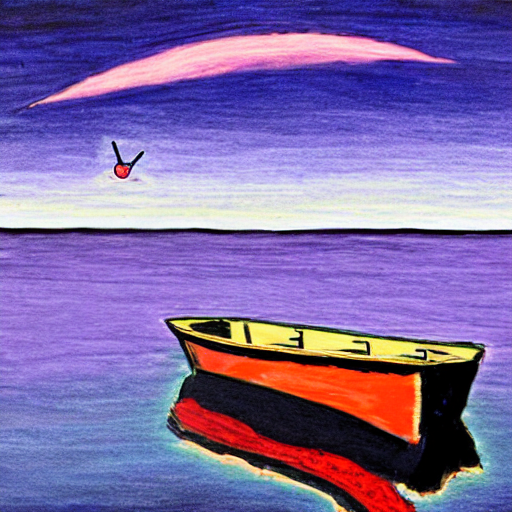

In [93]:
from PIL import Image

img1 = Image.open("/content/boat_with_comet.png")
#img2 = Image.open("/tmp/tmpxle37hlw/0d82c312-1f6e-4311-8cad-40a0e947f8c5.png")
display(img1)
#display(img2)

In [94]:
!pip install "accelerate>=0.16.0,<1" "transformers[torch]>=4.28.1,<5" "torch>=1.13.1,<2"


INFO: pip is looking at multiple versions of transformers[torch] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of transformers[torch] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 611.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [95]:
!pip install torch -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 412.1 kB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1


In [2]:
!pip install transformers torchvision

In [3]:
import torch
from transformers import pipeline

generate_text = pipeline(model="databricks/dolly-v2-3b", torch_dtype=torch.bfloat16, trust_remote_code=True, device_map="auto")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/5.68G [00:00<?, ?B/s]

The `GPTNeoXSdpaAttention` class is deprecated in favor of simply modifying the `config._attn_implementation`attribute of the `GPTNeoXAttention` class! It will be removed in v4.48


tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Device set to use cuda:0


In [4]:
res = generate_text("Explain to me the difference between nuclear fission and fusion.")
print(res[0]["generated_text"])


Nuclear fission is the splitting of a large atom into smaller smaller atoms, the result of which is energetic protons. This process is typically caused by very low energy hitting an atom very hard enough to crack it. Fusion on the other hand, is the process by which atomic nuclei (or protons and neutrons) merge together to create energy. This process is triggered when two nuclei collide at very high speeds which are just enough to overcome the nuclear binding energy and produce higher energy particles, e.g. gamma rays.


# Final Remarks

- This notebook covers several methods and models from the Hugging Face ecosystem:
  - **Sentence Transformers** for encoding and similarity.
  - **DPR** for question answering.
  - **CLIP** for image–text matching.
  - **Cosine similarity** computed with both sentence_transformers utilities and a custom NumPy function.
  - **Hugging Face Inference API** examples for summarization and text generation.
  
- Feel free to explore further, modify parameters, and add your own notes as you learn from these experiments.
